# Fetch Data

In [3]:
import pandas as pd
A = pd.read_csv("Project_5_LSTM_time_series_complete/Google_Stock_Price_Train.csv")

In [5]:
A.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


# Prepare Data

In [10]:
B = A[["Date","Open"]]
B.head()

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


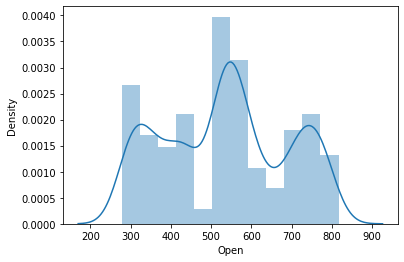

In [12]:
import seaborn as sb
sb.distplot(B.Open)

In [34]:
trd = B[["Open"]].values

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
trd_scaled = ss.fit_transform(trd)

In [36]:
X = []
Y = []

In [37]:
trd.shape

(1258, 1)

In [38]:
for i in range(4,1258,1):
    X.append(trd[i-4:i])
    Y.append(trd[i])

In [40]:
from numpy import array
X_arr = array(X)
Y_arr = array(Y)

In [46]:
X_arr.shape

(1254, 4, 1)

# Create a NN

In [61]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

nn = Sequential()
nn.add(LSTM(units=100,return_sequences=True,input_shape=(4, 1)))
nn.add(LSTM(units=100))
nn.add(Dense(1))
nn.compile(optimizer="adam",loss="mean_squared_error")
nn.fit(X_arr,Y_arr,epochs=150)

Epoch 1/150
40/40 [==============================] - 1s 13ms/step - loss: 301450.5000
Epoch 2/150
40/40 [==============================] - 1s 13ms/step - loss: 291073.2188
Epoch 3/150
40/40 [==============================] - 0s 12ms/step - loss: 286004.0312
Epoch 4/150
40/40 [==============================] - 1s 13ms/step - loss: 281440.6875
Epoch 5/150
40/40 [==============================] - 1s 13ms/step - loss: 277061.1875
Epoch 6/150
40/40 [==============================] - 0s 12ms/step - loss: 272826.1250
Epoch 7/150
40/40 [==============================] - 0s 11ms/step - loss: 268692.9375
Epoch 8/150
40/40 [==============================] - 0s 12ms/step - loss: 264650.0938
Epoch 9/150
40/40 [==============================] - 0s 11ms/step - loss: 260660.5938
Epoch 10/150
40/40 [==============================] - 0s 11ms/step - loss: 256761.6719
Epoch 11/150
40/40 [==============================] - 0s 11ms/step - loss: 252914.1875
Epoch 12/150
40/40 [==============================] 

# Testing

In [70]:
ts = pd.read_csv("/users/bajajvbh/Desktop/Vaibhav/Datasets/Google_Stock_Price_Test.csv")

In [76]:
tsd = ts[["Open"]].values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
tsd_scaled = ss.fit_transform(tsd)

In [79]:
tsd.shape

(20, 1)

In [80]:
Xtest = []
Ytest = []
for i in range(4,20,1):
    Xtest.append(tsd_scaled[i-4:i])
    Ytest.append(tsd_scaled[i])

In [83]:
Xt_arr = array(Xtest)
Yt_arr = array(Ytest)

In [87]:
pred_std = nn.predict(Xt_arr)

In [89]:
pred = ss.inverse_transform(pred_std)

In [92]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Ytest,pred)

1976.606853834774

In [94]:
ts["pred"]=pred

ValueError: Length of values does not match length of index

In [98]:
E = ts[4:21]

In [99]:
E["pred"] = pred

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
E

,Date,Open,High,Low,Close,Volume,pred
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400",307.904877
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800",269.797119
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900",272.206909
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100",412.404724
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200",860.995605
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100",901.217407
10,1/18/2017,805.81,806.21,800.99,806.07,"1,294,400",793.556885
11,1/19/2017,805.12,809.48,801.80,802.17,"919,300",954.998657
12,1/20/2017,806.91,806.91,801.69,805.02,"1,670,000",906.198792
13,1/23/2017,807.25,820.87,803.74,819.31,"1,963,600",808.767700


# What will be Forecasted Stock price on 1 February 2017?

In [113]:
x = pd.to_datetime("2/1/2017")
x.dayofyear

32

In [114]:
32-4

28

In [122]:
from datetime import datetime
day_num = "28"
print("The day number : " + str(day_num))
day_num.rjust(3 + len(day_num), '0')
year = "2017"
res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
print("Resolved date : " + str(res))

The day number : 28
Resolved date : 01-28-2017


In [138]:
index_of_date = ts[ts.Date == "1/26/2017"].index[0]

array([[837.81],
       [834.71],
       [814.66],
       [796.86]])

In [141]:
X_arr.shape

(1254, 4, 1)

In [148]:
t = ts[index_of_date:index_of_date+4][["Open"]].values
t = t.reshape(1,4,1)

In [149]:
nn.predict(t)

array([[472.5758]], dtype=float32)